In [2]:
#!/usr/bin/python3
# Samantha Hong sh974
# ECE 4250 Assignment 2
import numpy as np
import math
import time
import scipy
from scipy.io import wavfile 
from scipy import signal
import matplotlib.pyplot as plt

# 1. Convolutions

[ 4.20000000e+01+0.00000000e+00j -1.34728614e+01+5.18739261e+00j
  1.00000000e+00-6.35085296e+00j -1.33333333e+00-6.66666667e-01j
  1.66533454e-16-3.84592537e-16j -1.93805238e-01+1.14594072e+00j
 -2.00000000e+00+0.00000000e+00j -1.93805238e-01-1.14594072e+00j
  1.66533454e-16+3.84592537e-16j -1.33333333e+00+6.66666667e-01j
  1.00000000e+00+6.35085296e+00j -1.34728614e+01-5.18739261e+00j]


/usr/local/lib/python2.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


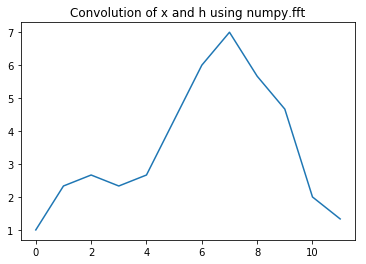

In [3]:
x = np.array([3,4,1,2,5,6,7,8,2,4])
h = np.array([1.0/3, 1.0/3, 1.0/3])
fft_size = x.size + h.size - 1

X = np.fft.fft(x, fft_size) # x in the frequency domain 
H = np.fft.fft(h, fft_size) # h in the frequency domain 
conv_freq = np.multiply(X,H) # convolving in frequency domain 
result = np.fft.ifft(conv_freq) # returning to time domain

print(conv_freq)

plt.plot(result)
plt.title("Convolution of x and h using numpy.fft")
plt.show()

In [4]:
# my convolution function from A1
def conv(x, h):
    conv_size = x.size + h.size - 1
    y = np.zeros(conv_size)
    for i in range(h.size):
        for j in range(x.size):
            y[j + i] = y[j + i] + h.item(i) * x.item(j)
    
    return y

# fft method 
def fft_conv(x, h):
    fft_size = x.size + h.size - 1

    X = np.fft.fft(x, fft_size) # x in the frequency domain 
    H = np.fft.fft(h, fft_size) # h in the frequency domain 
    conv_freq = np.multiply(X,H) # convolving in frequency domain 
    result = np.fft.ifft(conv_freq) # returning to time domain
    return result

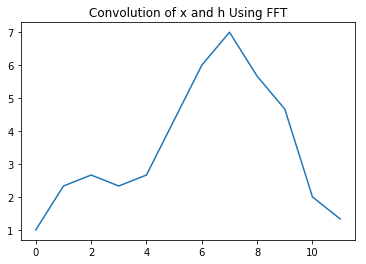

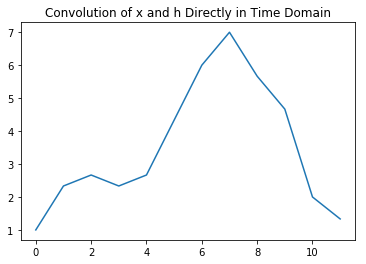

In [5]:
# plotting both methods of convolution to compare output
plt.plot(fft_conv(x, h))
plt.title("Convolution of x and h Using FFT")
plt.show()

plt.plot(conv(x, h))
plt.title("Convolution of x and h Directly in Time Domain")
plt.show()

# 2. Fourier Transforms

## Part A

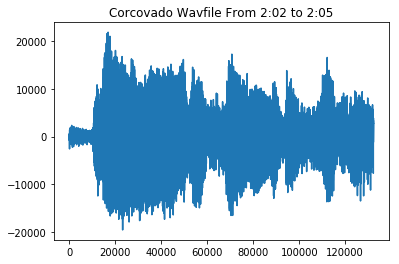

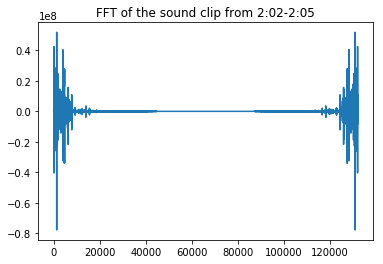

In [6]:
corcovado_rate, corcovado_data = wavfile.read('./HW1-Files/Corcovado.wav')

# converting to float and cropping from 2:02 to 2:05 
# corcovado wavfile length: 4 min 14 sec

corcovado = np.array([i[1] for i in corcovado_data]).astype(complex)
signal = corcovado[122*44100:125*44100]
plt.plot(signal)
plt.title('Corcovado Wavfile From 2:02 to 2:05')
plt.show()


# taking the fft of this sound clip
corcovado_fft = np.fft.fft(signal)
plt.plot(corcovado_fft)
plt.title("FFT of the sound clip from 2:02-2:05")
plt.show()



## Part B

DC component is the 0 Hz term. 
is equivalent to the average of all the samples in the window. 
The DC component of this is 483436.0


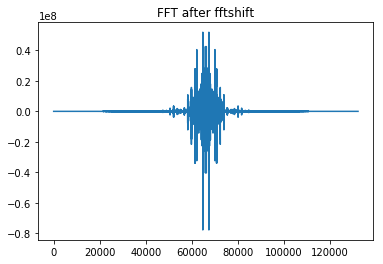

In [7]:
print("DC component is the 0 Hz term. ")
print("is equivalent to the average of all the samples in the window. ")
print("The DC component of this is " + str(np.absolute(corcovado_fft[0])))

fft_shift = np.fft.fftshift(corcovado_fft)
plt.plot(fft_shift)
plt.title("FFT after fftshift")
plt.show()

## Part C

In [8]:
idx = np.argmax(np.abs(corcovado_fft))
freq = abs(idx * 44100 / len(corcovado_fft))

print("The frequency (Hz) of the saxophone is ", freq)


('The frequency (Hz) of the saxophone is ', 439)


# 3. Implement the FFT

## Part A

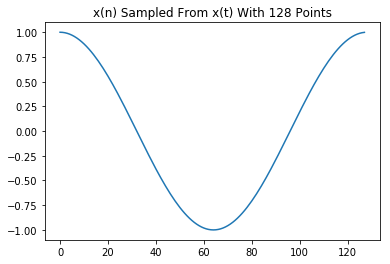

In [9]:
t = np.arange(0, 1, 1./128)
x_n = np.cos(2 * math.pi * t)
plt.plot(x_n)
plt.title('x(n) Sampled From x(t) With 128 Points')
plt.show()

This sampling rate is above the Nyquist rate. We can see that the original continuous signal x(t) can be reconstructed from x(n). Additionally, the sampling rate (128 Hz) is greater than the Nyquist rate (2 * 1 Hz).

## Part B

In [10]:
def N_DFT(x_n, N):
    X_k = np.zeros(N, dtype=complex)
    
    for k in range(N):
        for n in range(N):
            c = np.exp(-1j * 2 * np.pi * k * n / N)
            X_k[k] += x_n[n] * c
    return X_k
    

## Part C


### I. 

In [11]:
def separate(x_n, N): 
    n = np.arange(0, N/2)
    x_1 = np.zeros(N/2)
    x_2 = np.zeros(N/2)
    for i in range(len(x_1)):
        x_1[i] = x_n[2 * i]
        x_2[i] = x_n[2 * i + 1]
    
    return x_1, x_2

### II.

In [12]:
def My_FFT(x_n, N):
    x_n = x_n.astype(complex)
    
    # base case
    if (N < 2):
        return x_n
    
    # recursive case
    else:
        x_1, x_2 = separate(x_n, N)
        x1_fft = My_FFT(x_1, N/2) 
        x2_fft = My_FFT(x_2, N/2)

        for k in range(N/2):
            W = np.exp(-1j * 2 * np.pi * k / N)
            temp = W * x2_fft[k]
            x_n[int(k)] = temp + x1_fft[k] 
            x_n[int(k + N/2)] = x1_fft[k] - temp

        # return the final result
        return x_n

## Part D

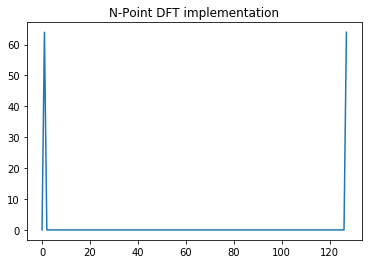

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


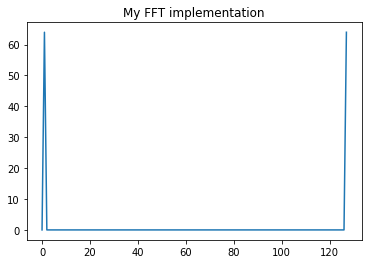

In [13]:
t = np.arange(0, 1, 1./128)
x_n = np.cos(2 * math.pi * t)

# part (b) DFT
plt.plot(N_DFT(x_n, len(x_n)))
plt.title("N-Point DFT implementation")
plt.show()

# part (c) FFT
plt.plot(My_FFT(x_n, len(x_n)))
plt.title("My FFT implementation")
plt.show()


## Part E

In [14]:
clip_rate, clip_data = wavfile.read('./HW1-Files/clip.wav')
clip_data = np.array([i[1] for i in clip_data]).astype(complex)
signal = clip_data[0:8192]

/usr/local/lib/python2.7/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [15]:
dft_startTime = time.time()
dft_result = N_DFT(signal, len(signal))
dft_time = time.time() - dft_startTime

print(dft_time)

118.154667139


In [16]:
fft_startTime = time.time()
fft_result = My_FFT(signal, len(signal))
fft_time = time.time() - fft_startTime

print(fft_time)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


0.356539964676


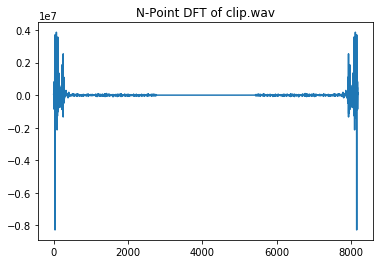

('N-Point DFT computing time: ', 121.77304196357727)


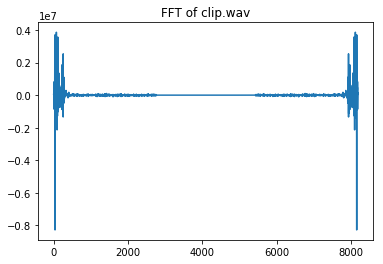

('FFT computing time: ', 0.29848599433898926)


In [31]:
plt.plot(dft_result)
plt.title('N-Point DFT of clip.wav')
plt.show()

print('N-Point DFT computing time: ', dft_time)

plt.plot(fft_result)
plt.title('FFT of clip.wav')
plt.show()

print('FFT computing time: ', fft_time)